# 1.Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from statsmodels.api import qqplot,add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import f1_score, roc_curve , auc
from scipy import stats

import lightgbm as lgb

In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
fontname = 'NanumGothic.ttf' 
fontname = font_manager.FontProperties(fname=fontname).get_name()
plt.style.use('seaborn-white')
rc('font', family=fontname) 

# 2.탐색적분석

In [3]:
df_new_b = pd.read_csv('final_business.csv')
df_new_b = df_new_b.drop(['Unnamed: 0'],axis = 1,inplace = False)  

df_new_b.head()

,고객ID,고객유형,거주지,시,구군,남여구분,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,결제은행,해약여부,계정수
0,25702131,사업자,경기도,경기도,화성시,여자,멤버십,멤버십S,렌탈재계약,10-20-2014,12,CMS,DES-1,66900,계약확정,0,없음,기업은행,정상,1
1,25742841,사업자,경기도,경기도,가평군,여자,렌탈,프로모션,서비스 방문,10-21-2014,60,CMS,DES-1,142200,계약확정,0,없음,농협회원조합,정상,1
2,25742683,사업자,서울특별시,서울특별시,강남구,여자,렌탈,프로모션,일반,10-21-2014,60,CMS,DES-3A,102900,계약확정,0,없음,신한은행,정상,2
3,25742683,사업자,서울특별시,서울특별시,강남구,여자,렌탈,프로모션,일반,11-19-2014,60,CMS,DES-3A,102900,계약확정,0,없음,신한은행,정상,2
4,25851817,사업자,서울특별시,서울특별시,강남구,여자,멤버십,멤버십S,렌탈재계약,10-21-2014,12,CMS,DES-1,96600,계약확정,0,없음,국민은행,정상,1


In [4]:
prem = df_new_b[df_new_b['계정수']>=5]

In [5]:
df_new_b = prem.drop_duplicates(['고객ID'])

In [6]:
df_new_b['고객ID'].value_counts()

25732732    1
25732362    1
25721902    1
25732653    1
25863590    1
25850299    1
25854377    1
25804968    1
25740582    1
25741859    1
25732002    1
25733024    1
25727901    1
25777820    1
25855259    1
25722839    1
25734778    1
25870229    1
25722644    1
25732659    1
25738385    1
25733392    1
25814540    1
25731964    1
25744138    1
25742886    1
25731715    1
25740210    1
25743283    1
25750762    1
25733908    1
25742586    1
25854072    1
25739766    1
25741172    1
25734386    1
25742699    1
25740219    1
25732525    1
25731616    1
25758946    1
25731903    1
25742550    1
25731755    1
25740370    1
25854544    1
25869517    1
25734218    1
25733189    1
25734595    1
25742066    1
25740607    1
25784382    1
25733179    1
25741178    1
25737986    1
Name: 고객ID, dtype: int64

In [18]:
df_new_b.columns

Index(['고객ID', '고객유형', '거주지', '시', '구군', '남여구분', '판매유형', '계약유형', '유통경로', '계약일',
       '계약기간', '납부유형', '제품군', '월랜탈비용', '계약상태', '연체건수', '연체여부', '결제은행', '해약여부',
       '계정수'],
      dtype='object')

# 범주형변수

In [19]:
obj_cols = df_new_b.select_dtypes('object').columns
obj_cols

Index(['고객유형', '거주지', '시', '구군', '남여구분', '판매유형', '계약유형', '유통경로', '계약일', '납부유형',
       '제품군', '계약상태', '연체여부', '결제은행', '해약여부'],
      dtype='object')

In [20]:
for col in obj_cols:
    _n = len(df_new_b[col].value_counts())
    print(col,':',str(_n))

고객유형 : 1
거주지 : 5
시 : 11
구군 : 43
남여구분 : 1
판매유형 : 2
계약유형 : 7
유통경로 : 14
계약일 : 40
납부유형 : 4
제품군 : 3
계약상태 : 1
연체여부 : 2
결제은행 : 16
해약여부 : 1


In [60]:
df_new_b.head()

,고객ID,고객유형,거주지,시,구군,남여구분,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,결제은행,해약여부,계정수
9,25869517,사업자,경상도,부산광역시,강서구,여자,렌탈,프로모션,렌탈총판,10-21-2014,60,가상계좌,DES-1,96900,계약확정,0,없음,농협중앙회,정상,45
66,25777820,사업자,경기도,경기도,남양주시,여자,렌탈,프로모션,R유통사,10-21-2014,36,가상계좌,DES-1,180750,계약확정,1,있음,신한은행,정상,187
294,25732653,사업자,서울특별시,서울특별시,강동구,여자,렌탈,프로모션,서비스 방문,10-22-2014,60,CMS,DES-1,111900,계약확정,13,있음,농협회원조합,정상,5
330,25742699,사업자,경기도,경기도,안산시 단원구,여자,렌탈,통합 패키지,일반,10-22-2014,60,CMS,DES-1,81900,계약확정,0,없음,농협중앙회,정상,16
403,25742550,사업자,경상도,부산광역시,연제구,여자,렌탈,일반,서비스 방문,10-23-2014,60,CMS,DES-2,87900,계약확정,0,없음,부산은행,정상,5


# 단변수 그래프

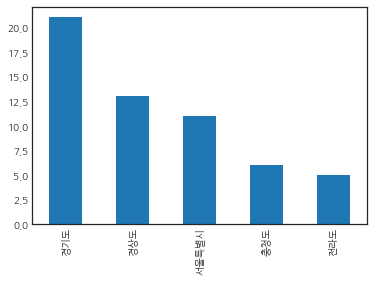

In [21]:
df_count = df_new_b['거주지'].value_counts()
df_count.plot.bar()

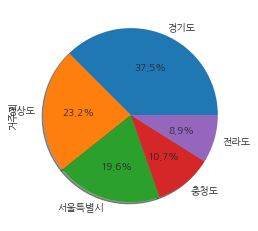

In [22]:
df_new_b['거주지'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

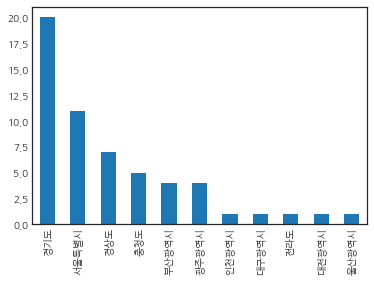

In [23]:
df_count = df_new_b['시'].value_counts()
df_count.plot.bar()

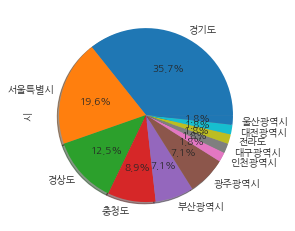

In [24]:
df_new_b['시'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

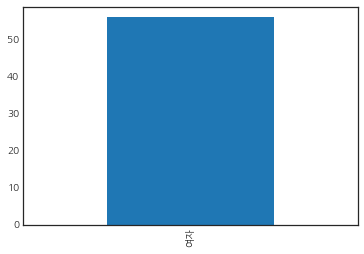

In [26]:
df_count = df_new_b['남여구분'].value_counts()
df_count.plot.bar()

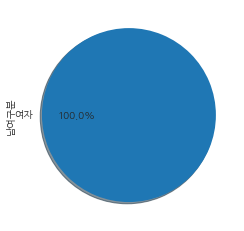

In [27]:
df_new_b['남여구분'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

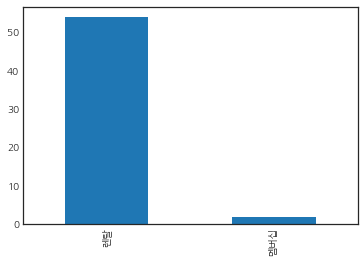

In [28]:
df_count = df_new_b['판매유형'].value_counts()
df_count.plot.bar()

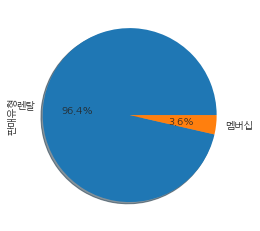

In [29]:
df_new_b['판매유형'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

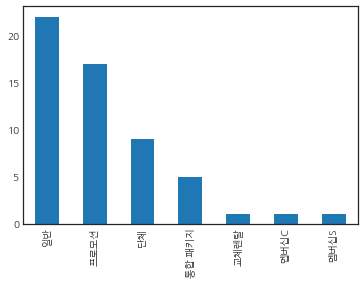

In [30]:
df_count = df_new_b['계약유형'].value_counts()
df_count.plot.bar()

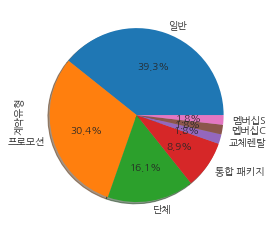

In [31]:
df_new_b['계약유형'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

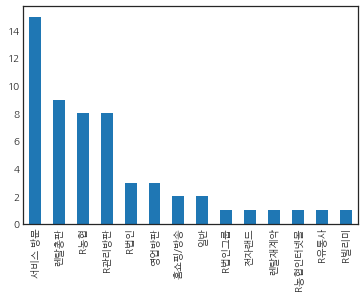

In [32]:
df_count = df_new_b['유통경로'].value_counts()
df_count.plot.bar()

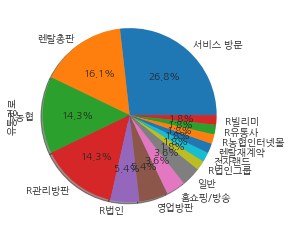

In [33]:
df_new_b['유통경로'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

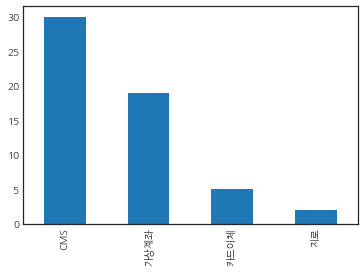

In [34]:
df_count = df_new_b['납부유형'].value_counts()
df_count.plot.bar()

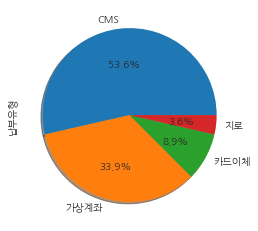

In [35]:
df_new_b['납부유형'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

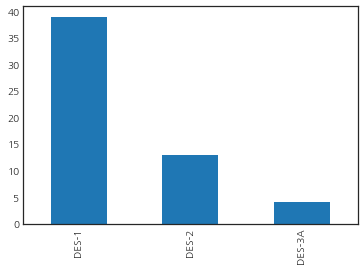

In [36]:
df_count = df_new_b['제품군'].value_counts()
df_count.plot.bar()

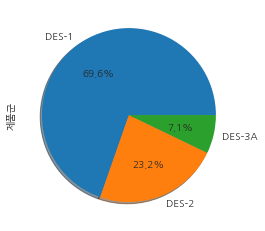

In [37]:
df_new_b['제품군'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

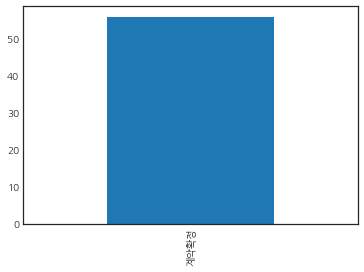

In [38]:
df_count = df_new_b['계약상태'].value_counts()
df_count.plot.bar()

# 불균형 데이터

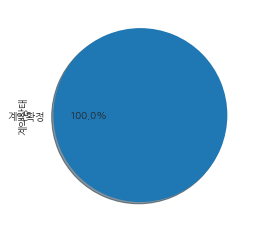

In [39]:
df_new_b['계약상태'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

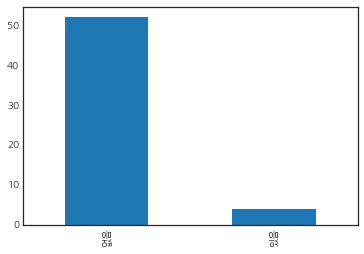

In [40]:
df_count = df_new_b['연체여부'].value_counts()
df_count.plot.bar()

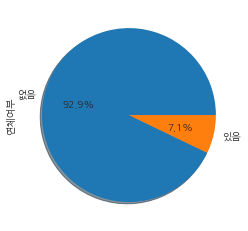

In [41]:
df_new_b['연체여부'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

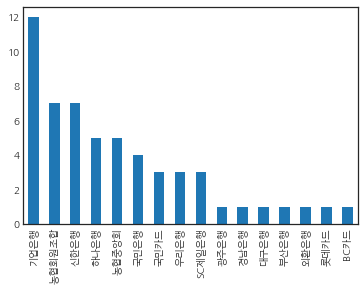

In [42]:
df_count = df_new_b['결제은행'].value_counts()
df_count.plot.bar()

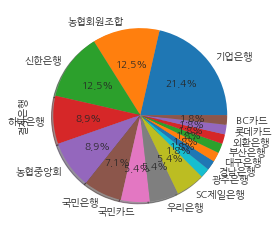

In [43]:
df_new_b['결제은행'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

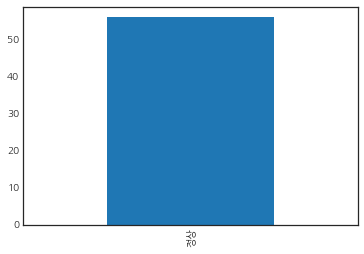

In [44]:
df_count = df_new_b['해약여부'].value_counts()
df_count.plot.bar()

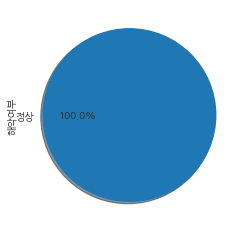

In [45]:
df_new_b['해약여부'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

In [46]:
df_new_b['해약여부'].value_counts()

정상    56
Name: 해약여부, dtype: int64

법인은 해지여부 관점에서 말할게 없다.

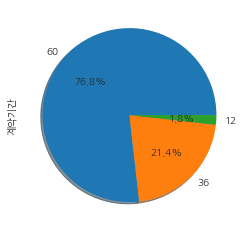

In [59]:
df_new_b['계약기간'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

# 해약여부에 따른 범주형 변수 그래프

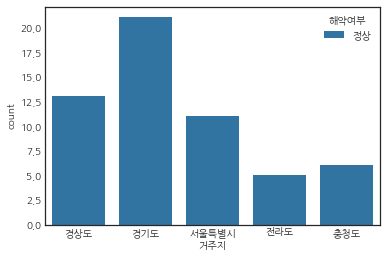

In [49]:
sns.countplot('거주지',hue='해약여부',data=df_new_b)
plt.show()

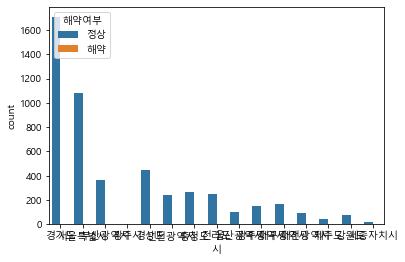

In [61]:
sns.countplot('시',hue='해약여부',data=df_new_b)
plt.show()

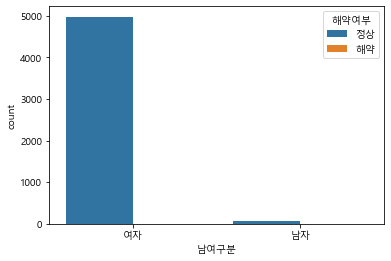

In [62]:
sns.countplot('남여구분',hue='해약여부',data=df_new_b)
plt.show()

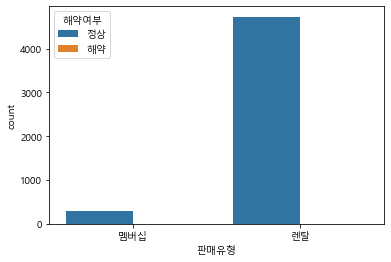

In [63]:
sns.countplot('판매유형',hue='해약여부',data=df_new_b)
plt.show()

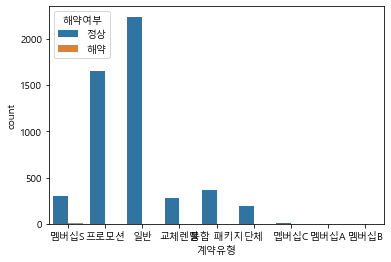

In [64]:
sns.countplot('계약유형',hue='해약여부',data=df_new_b)
plt.show()

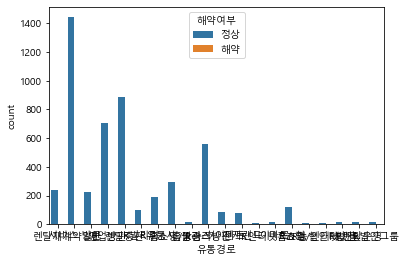

In [65]:
sns.countplot('유통경로',hue='해약여부',data=df_new_b)
plt.show()

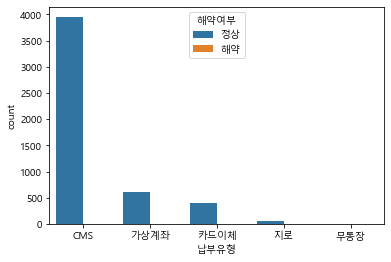

In [66]:
sns.countplot('납부유형',hue='해약여부',data=df_new_b)
plt.show()

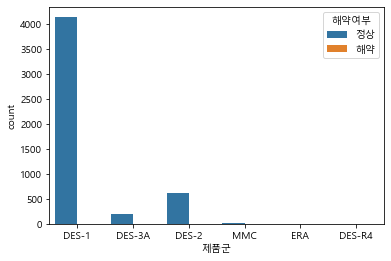

In [67]:
sns.countplot('제품군',hue='해약여부',data=df_new_b)
plt.show()

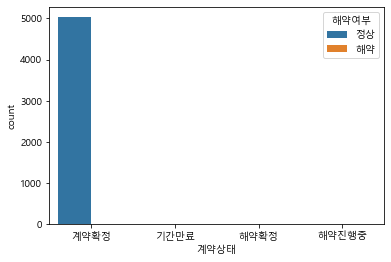

In [68]:
sns.countplot('계약상태',hue='해약여부',data=df_new_b)
plt.show()

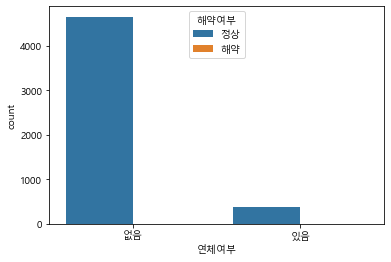

In [69]:
sns.countplot('연체여부',hue='해약여부',data=df_new_b)
plt.show()

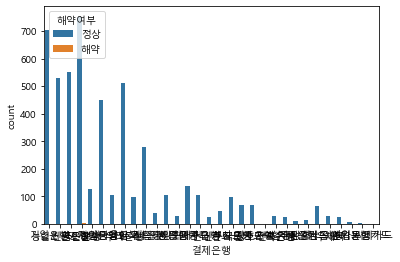

In [70]:
sns.countplot('결제은행',hue='해약여부',data=df_new_b)
plt.show()

# 카이제곱 검정

In [50]:
a = pd.crosstab(df_new_b['거주지'], df_new_b['해약여부'], margins=True)
a

해약여부,정상,All
거주지,,
경기도,21,21
경상도,13,13
서울특별시,11,11
전라도,5,5
충청도,6,6
All,56,56


In [51]:
c1 = [a.loc['경기도'][0],a.loc['경기도'][1]]
c2 = [a.loc['경상도'][0],a.loc['경상도'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)

1.0


두 집단가 이탈율 차이 없음

In [52]:
a = pd.crosstab(df_new_b['시'], df_new_b['해약여부'], margins=True)
a

해약여부,정상,All
시,,
경기도,20,20
경상도,7,7
광주광역시,4,4
대구광역시,1,1
대전광역시,1,1
부산광역시,4,4
서울특별시,11,11
울산광역시,1,1
인천광역시,1,1


In [84]:
c1 = [a.loc['경기도'][0],a.loc['경기도'][1]]
c2 = [a.loc['서울특별시'][0],a.loc['서울특별시'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)

0.9551745042596298


두 집단간 이탈율 차이 없다.

In [85]:
a = pd.crosstab(df_new_b['남여구분'], df_new_b['해약여부'], margins=True)
a

해약여부,정상,해약,All
남여구분,,,
남자,60,5,65
여자,4971,0,4971
All,5031,5,5036


In [86]:
c1 = [a.loc['남자'][0],a.loc['남자'][1]]
c2 = [a.loc['여자'][0],a.loc['여자'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)

3.3632729100465127e-69


유의수준 0.05보다 작으므로 귀무가설(렌탈집단과 멤버십집단은 이탈율이 같다)을 기각할 수 있다.

즉, 두 집단의 이탈율은 다르다.

In [72]:
a = pd.crosstab(df_new_b['판매유형'], df_new_b['해약여부'], margins=True)
a

해약여부,정상,All
판매유형,,
렌탈,54,54
멤버십,2,2
All,56,56


In [ ]:
df_new_b

In [88]:
c1 = [a.loc['렌탈'][0],a.loc['렌탈'][1]]
c2 = [a.loc['멤버십'][0],a.loc['멤버십'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)

5.984621375668665e-15


유의수준 0.05보다 작으므로 귀무가설(렌탈집단과 멤버십집단은 이탈율이 같다)을 기각할 수 있다.

즉, 두 집단의 이탈율은 다르다. 

In [71]:
a = pd.crosstab(df_new_b['계약유형'], df_new_b['해약여부'], margins=True)
a

해약여부,정상,All
계약유형,,
교체렌탈,1,1
단체,9,9
멤버십S,1,1
멥버십C,1,1
일반,22,22
통합 패키지,5,5
프로모션,17,17
All,56,56


In [93]:
c1 = [a.loc['멤버십S'][0],a.loc['멤버십S'][1]]
c2 = [a.loc['프로모션'][0],a.loc['프로모션'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)

3.743720974991194e-06


일반과 프로모션간에 해지율 차이 없다.

In [95]:
a = pd.crosstab(df_new_b['유통경로'], df_new_b['해약여부'], margins=True)
a

해약여부,정상,해약,All
유통경로,,,
R관리방판,561,3,564
R농협,119,0,119
R농협인터넷몰,7,0,7
R렌탈운영,13,0,13
R법인,19,0,19
R법인그룹,18,0,18
R빌리미,102,0,102
R유통사,188,0,188
R인터넷,9,0,9


In [97]:
c1 = [a.loc['R관리방판'][0],a.loc['R관리방판'][1]]
c2 = [a.loc['홈쇼핑/방송'][0],a.loc['홈쇼핑/방송'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)

0.51521273223531


두집단간 해지율 차이 있다.

In [98]:
a = pd.crosstab(df_new_b['납부유형'], df_new_b['해약여부'], margins=True)
a

해약여부,정상,해약,All
납부유형,,,
CMS,3953,4,3957
가상계좌,611,0,611
무통장,1,0,1
지로,65,0,65
카드이체,401,1,402
All,5031,5,5036


In [99]:
c1 = [a.loc['CMS'][0],a.loc['CMS'][1]]
c2 = [a.loc['카드이체'][0],a.loc['카드이체'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)

0.9520469503408846


CMS와 카드이체 간에 해지율 차이 있다.

In [100]:
a = pd.crosstab(df_new_b['제품군'], df_new_b['해약여부'], margins=True)
a

해약여부,정상,해약,All
제품군,,,
DES-1,4142,5,4147
DES-2,623,0,623
DES-3A,213,0,213
DES-R4,11,0,11
ERA,17,0,17
MMC,25,0,25
All,5031,5,5036


In [101]:
c1 = [a.loc['DES-1'][0],a.loc['DES-1'][1]]
c2 = [a.loc['DES-2'][0],a.loc['DES-2'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)

0.8389674307731579


두집단간 차이 있다.

In [102]:
a = pd.crosstab(df_new_b['계약상태'], df_new_b['해약여부'], margins=True)
a

해약여부,정상,해약,All
계약상태,,,
계약확정,5026,1,5027
기간만료,4,0,4
해약진행중,1,0,1
해약확정,0,4,4
All,5031,5,5036


In [103]:
c1 = [a.loc['계약확정'][0],a.loc['계약확정'][1]]
c2 = [a.loc['해약확정'][0],a.loc['해약확정'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)

0.0


두집단간 차이 있음

In [6]:
a = pd.crosstab(df_new_b['연체여부'], df_new_b['해약여부'], margins=True)
a

해약여부,정상,해약,All
연체여부,,,
없음,4652,5,4657
있음,379,0,379
All,5031,5,5036


In [105]:
c1 = [a.loc['있음'][0],a.loc['있음'][1]]
c2 = [a.loc['없음'][0],a.loc['없음'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)

0.8338084870976082


유의수준 0.05보다 크므로 귀무가설(렌탈집단과 멤버십집단은 이탈율이 같다)을 기각할 수 없다.

즉, 두 집단의 이탈율은 같다.

In [106]:
a = pd.crosstab(df_new_b['결제은행'], df_new_b['해약여부'], margins=True)
a

해약여부,정상,해약,All
결제은행,,,
BC카드,97,0,97
NH농협카드,2,0,2
SC제일은행,128,1,129
경남은행,65,0,65
광주은행,67,0,67
국민은행,752,2,754
국민카드,68,0,68
기업은행,704,0,704
농협중앙회,450,1,451


In [108]:
c1 = [a.loc['롯데카드'][0],a.loc['롯데카드'][1]]
c2 = [a.loc['국민은행'][0],a.loc['국민은행'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)

0.7056249352226394


롯데카드와 국민카드 그룹간 해지율 차이 없음

# 연속형 변수

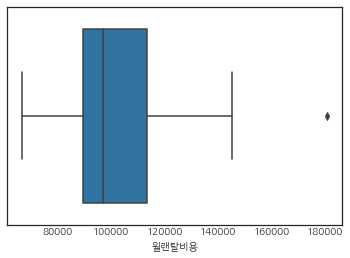

In [53]:
sns.boxplot(x=df_new_b['월랜탈비용'])

In [81]:
df_new_b['판매유형'].value_counts()

렌탈     54
멤버십     2
Name: 판매유형, dtype: int64

In [82]:
df_new_b[df_new_b['판매유형']=='멤버십']

,고객ID,고객유형,거주지,시,구군,남여구분,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,결제은행,해약여부,계정수
1353,25855259,사업자,서울특별시,서울특별시,강남구,여자,멤버십,멤버십S,렌탈재계약,11-11-2014,12,CMS,DES-1,66900,계약확정,0,없음,신한은행,정상,8
1806,25744138,사업자,서울특별시,서울특별시,중구,여자,멤버십,멥버십C,R농협인터넷몰,11-19-2014,36,카드이체,DES-3A,75900,계약확정,0,없음,국민카드,정상,5


In [54]:
def ttest(x):
    OUT = df_new_b[df_new_b['해약여부'] == '해약'][x] 
    IN = df_new_b[df_new_b['해약여부'] == '정상'][x]
    lresult = stats.levene(OUT.values, IN.values)
    print('LeveneResult(F) : %.3f \np-value : %.3f' % (lresult))

ttest('월랜탈비용')

LeveneResult(F) : nan 
p-value : nan


/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 해약여부에 따른 월랜탈비용 그룹의 차이가 있다고 볼 수 있다.

In [55]:
OUT = df_new_b[df_new_b['연체여부']=='없음']['월랜탈비용'] 
IN = df_new_b[df_new_b['연체여부']=='있음']['월랜탈비용'] 

f_result = stats.f_oneway(OUT, IN)
f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print('One-way-ANOVA')
print('F검정통계량:{}'.format(f))
print('p-value:{}'.format(p))

One-way-ANOVA
F검정통계량:2.15
p-value:0.148


In [56]:
OUT = df_new_b[df_new_b['남여구분']=='남자']['월랜탈비용'] 
IN = df_new_b[df_new_b['남여구분']=='여자']['월랜탈비용'] 

f_result = stats.f_oneway(OUT, IN)
f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print('One-way-ANOVA')
print('F검정통계량:{}'.format(f))
print('p-value:{}'.format(p))

One-way-ANOVA
F검정통계량:nan
p-value:nan


/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3225: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


In [57]:
df1 = df_new_b[df_new_b['계약기간']==60]['월랜탈비용'] 
df2 = df_new_b[df_new_b['계약기간']==36]['월랜탈비용'] 
df3 = df_new_b[df_new_b['계약기간']==39]['월랜탈비용'] 
df4 = df_new_b[df_new_b['계약기간']==12]['월랜탈비용'] 


f_result = stats.f_oneway(df1,df2,df3,df4)
f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print('One-way-ANOVA')
print('F검정통계량:{}'.format(f))
print('p-value:{}'.format(p))

One-way-ANOVA
F검정통계량:nan
p-value:nan


유의수준 5% 에서 검정결과 p값이 0.0 이므로 그룹간의 평균차이가 있다고 볼 수 있다.

In [61]:
a = df_new_b['계약일'].value_counts()  # 46000-> 40000
# a.values
# a.index

In [63]:
df1 = pd.DataFrame(a.index, columns=['계약일'])
df2 = pd.DataFrame(a.values, columns=['계약수'])
df = pd.merge(df1, df2, left_index=True, right_index=True)

df_time = pd.merge(df_new_b ,df, on = ['계약일'],how = 'right')
df_time.head()

,고객ID,고객유형,거주지,시,구군,남여구분,판매유형,계약유형,유통경로,계약일,...,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,결제은행,해약여부,계정수,계약수
0,25869517,사업자,경상도,부산광역시,강서구,여자,렌탈,프로모션,렌탈총판,10-21-2014,...,가상계좌,DES-1,96900,계약확정,0,없음,농협중앙회,정상,45,2
1,25777820,사업자,경기도,경기도,남양주시,여자,렌탈,프로모션,R유통사,10-21-2014,...,가상계좌,DES-1,180750,계약확정,1,있음,신한은행,정상,187,2
2,25732653,사업자,서울특별시,서울특별시,강동구,여자,렌탈,프로모션,서비스 방문,10-22-2014,...,CMS,DES-1,111900,계약확정,13,있음,농협회원조합,정상,5,2
3,25742699,사업자,경기도,경기도,안산시 단원구,여자,렌탈,통합 패키지,일반,10-22-2014,...,CMS,DES-1,81900,계약확정,0,없음,농협중앙회,정상,16,2
4,25742550,사업자,경상도,부산광역시,연제구,여자,렌탈,일반,서비스 방문,10-23-2014,...,CMS,DES-2,87900,계약확정,0,없음,부산은행,정상,5,1


In [64]:
df_time = df_time.drop_duplicates(['계약일'])

In [65]:
df_time['계약일'] = pd.to_datetime(df_time['계약일'])

In [66]:
df_time.set_index('계약일',inplace = True)

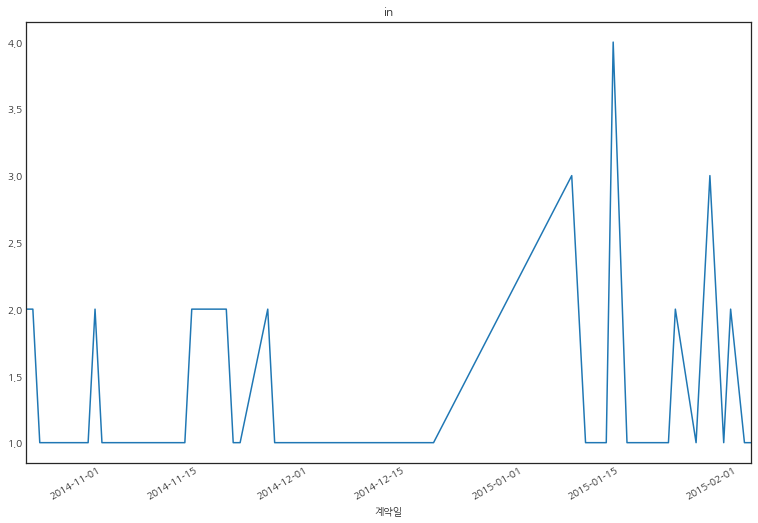

In [67]:
a = df_time['계약수'].plot(title='in')
fig = a.get_figure()
fig.set_size_inches(13,9)